In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_excel('eordata.xlsx')

df.head(5)

,Number,Country,"Permeability , md","Depth , ft","Gravity , °API","Viscosity , cp","Temprature , °F",Saturation,Observed
0,1,USA,40,7100,22,20,153.0,1,Polmer
1,2,USA,33,5250,40,1,135.0,50,Polmer
2,3,USA,16,7900,30,3,150.0,75,Polmer
3,4,USA,550,700,35,6,80.0,64,Polmer
4,5,USA,471,4010,15,75,150.0,62,Polmer


In [6]:
df.drop('Number', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)
df.head(5)

,"Permeability , md","Depth , ft","Gravity , °API","Viscosity , cp","Temprature , °F",Saturation,Observed
0,40,7100,22,20,153.0,1,Polmer
1,33,5250,40,1,135.0,50,Polmer
2,16,7900,30,3,150.0,75,Polmer
3,550,700,35,6,80.0,64,Polmer
4,471,4010,15,75,150.0,62,Polmer


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Observed'] = le.fit_transform(df['Observed'])

In [18]:
X = df.to_numpy()


y = X[:, -1]

X = X[:, :-1]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
mean=X_train.mean(axis=0)
std=np.std(X_train, axis=0,dtype='float64')
X_train=(X_train-mean)/std
X_test=(X_test-mean)/std

In [24]:
print(np.isnan(X_train).any())
print(np.isinf(X_train).any())

True
False


In [26]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

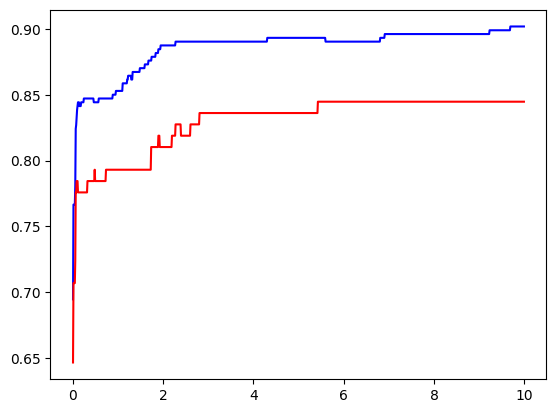

In [28]:
Train_score=[]
Test_score=[]
for c in np.arange(0.01,10, 0.01):
    clf=SVC(C=c, kernel='rbf')
    clf.fit(X_train, y_train)
    Train_score.append(clf.score(X_train,y_train))
    Test_score.append(clf.score(X_test,y_test))

    
plt.plot(np.arange(0.01,10, 0.01), np.array(Train_score), 'b-')
plt.plot(np.arange(0.01,10, 0.01), np.array(Test_score), 'r-')

In [8]:
clf=SVC(C=6.5, kernel='rbf')
clf.fit(X_train, y_train)

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.935672514619883
0.8771929824561403


In [44]:
SIRI=np.array([[12.5,2.43, 9022, 32.9, 1.02, 197]])

In [36]:
SIRI_N=np.nan_to_num((SIRI-mean)/std)

In [48]:
clf.predict(SIRI_N)

array([0.])

In [52]:
print(le.classes_[0])


CO2
